In [47]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


## Exploring Data

In [40]:
data_path = '../data/binary_alpha_digits/binaryalphadigs.mat'
data = sp.io.loadmat(data_path)

In [41]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dat', 'numclass', 'classlabels', 'classcounts'])

In [78]:
data['dat'].shape, data['dat'][0, 0].shape

((36, 39), (20, 16))

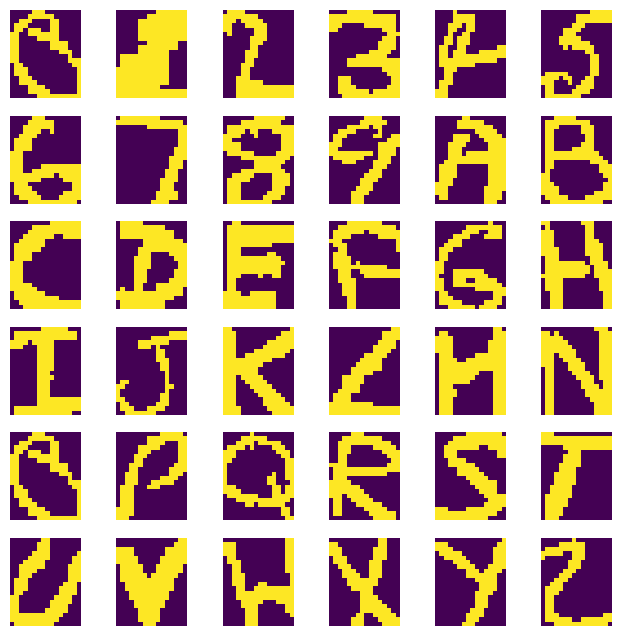

In [73]:
# Binary 20x16 digits of "0" through "9" and capital "A" through "Z". 39 examples of each class.
alpha_digits = data['dat']
# Plot The zeroth digit of the class zero
fig, ax = plt.subplots(6,6, figsize=(8,8))
# Remove space between figures
#plt.subplots_adjust(wspace=0, hspace=0)

for i in range(6):
    for j in range(6):
        ax[i,j].imshow(alpha_digits[i*6+j,0])
        ax[i, j].axis('off')
plt.show()

In [79]:
def lire_alpha_digit(data_path: str, indices=None):
    """
    :param data_path: path to import data
    :param indices: index of alpha digits we want to use for training
    :return: array (n, p): n number of sample, p number of pixels
    """
    data = sp.io.loadmat(data_path, simplify_cells=True)
    alpha_digits = data['dat']
    
    if indices is not None:
        alpha_digits = alpha_digits[indices]
    
    images = np.zeros((alpha_digits.size, alpha_digits[0, 0].size))
    im = 0  # image index
    for i in range(alpha_digits.shape[0]):
        for j in range(alpha_digits.shape[1]):
            images[im, :] = alpha_digits[i, j].flatten()
            im += 1

    return images

In [81]:
alpha_digits = lire_alpha_digit(data_path,np.array([0,1,2,3,4,5,6,7,8,9]))
alpha_digits.shape

(390, 320)

In [84]:
data_mnist_path = '../data/MNIST/mnist_all.mat'
data = sp.io.loadmat(data_mnist_path)

In [85]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train0', 'test0', 'train1', 'test1', 'train2', 'test2', 'train3', 'test3', 'train4', 'test4', 'train5', 'test5', 'train6', 'test6', 'train7', 'test7', 'train8', 'test8', 'train9', 'test9'])

In [86]:
data['train0'].shape

(5923, 784)

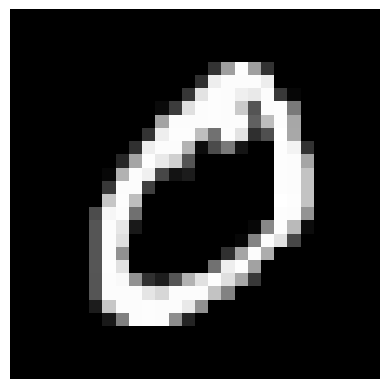

In [23]:

# Access the loaded data
mnist_data = data['train0']

# Visualize the first image
plt.imshow(mnist_data[0].reshape(28,28), cmap='gray') # Reshape it
plt.axis('off')
plt.show()


In [31]:
def plot_digit(mnist_data, i=0):
    # Visualize the first image
    plt.imshow(mnist_data[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

In [26]:
def lire_mnist(data_path: str, indices: np.ndarray, data_type: str, thrshold: int = 127):
    """
    :param data_path: path to import data
    :param indices: index of alpha digits we want to use for training
    :param data_type: "train", "test"
    :param thrshold: threshold to binarize the images
    :return: array (n, p): n number of sample, p number of pixels
    """
    mnist_all = sp.io.loadmat(data_path, simplify_cells=True)

    data_mnist = []
    label = []
    for i in indices:
        key = data_type + str(i)
        data_mnist.append((mnist_all[key] > thrshold).astype(int))
        label.append(i * np.ones(mnist_all[key].shape[0]))

    data_mnist = np.vstack(data_mnist)
    label = np.concatenate(label, axis=0)

    return data_mnist, label

In [27]:
data_mnist, label = lire_mnist(data_path, np.arange(2), "train")

(12665, 784) (12665,)


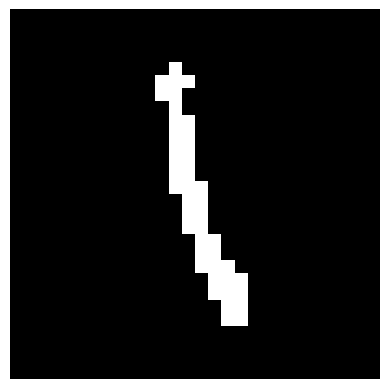

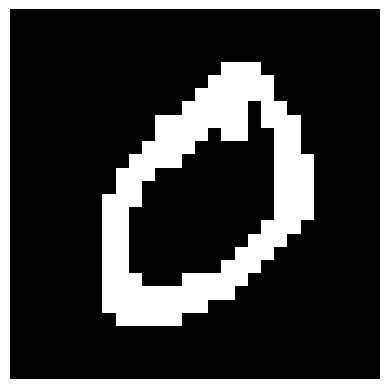

In [34]:
print(data_mnist.shape, label.shape)
plot_digit(data_mnist, 8000)
plot_digit(data_mnist, 0)

In [35]:
def lire_alpha_digit(data_path: str, indices=None):
    """
    :param data_path: path to import data
    :param indices: index of alpha digits we want to use for training
    :return: array (n, p): n number of sample, p number of pixels
    """
    mat = sp.io.loadmat(data_path, simplify_cells=True)
    bad = mat["dat"][indices, :]
    images = np.zeros((bad.size, bad[0, 0].size))
    im = 0  # image index
    for i in range(bad.shape[0]):
        for j in range(bad.shape[1]):
            images[im, :] = bad[i, j].flatten()
            im += 1

    return images

In [37]:
mat = sp.io.loadmat(data_path, simplify_cells=True)

In [39]:
mat['dat']

KeyError: 'dat'